In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
import soccerdata as sd

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'w'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [10]:
# setup a mplsoccer FontManager to download google fonts (Roboto-Regular / SigmarOne-Regular)
fm = FontManager()
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
                       'RubikMonoOne-Regular.ttf')

In [83]:
def scrape_stats(mi):
    params = {'matchId': mi}
    response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)
    data = response.json()
    shotmap = data['content']['shotmap']['shots']
    top_stats = data['content']['stats']['Periods']['All']['stats'][0]['stats']
    pass_stats = data['content']['stats']['Periods']['All']['stats'][3]['stats']
    defensive_stats = data['content']['stats']['Periods']['All']['stats'][4]['stats']
    stats_df = pd.DataFrame(top_stats)
    passstats_df = pd.DataFrame(pass_stats)
    defensestats_df = pd.DataFrame(defensive_stats)
    shots_df = pd.DataFrame(shotmap)
    shots_df['matchId'] = mi
    stats_df['matchId'] = mi
    passstats_df['matchId'] = mi
    defensestats_df['matchId'] = mi
    return shots_df,stats_df,passstats_df,defensestats_df

In [84]:
shots_df,stats_df,passstats_df,defensestats_df = scrape_stats(4043837)

In [396]:
df_team1.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,matchId
0,2696028051,Goal,8570,1152455,Florian Wirtz,17.251471,32.78000,10,NaN,False,True,NaN,NaN,36.97375,0.282526,0.102611,0.3744,RightFoot,RegularPlay,FirstHalf,False,"{'x': 0.21329365079365015, 'y': 0.074742411216...",False,False,Florian,Wirtz,Florian Wirtz,#464646,4043837
1,2696028913,Goal,8570,1156141,Jamal Musiala,12.000000,36.28750,19,NaN,False,True,NaN,NaN,35.98250,2.074000,0.175834,0.4265,RightFoot,RegularPlay,FirstHalf,False,"{'x': 0.47552910052910013, 'y': 0.548677245978...",False,True,Jamal,Musiala,Jamal Musiala,#464646,4043837
2,2696029565,AttemptSaved,8570,749736,Kai Havertz,18.002941,32.39875,28,NaN,False,True,103.672414,33.695,36.82125,0.488000,0.138585,0.3661,LeftFoot,FreeKick,FirstHalf,False,"{'x': 0.2536375661375645, 'y': 0.1291005284656...",False,False,Kai,Havertz,Kai Havertz,#464646,4043837
3,2696030523,AttemptSaved,8570,178818,Ilkay Gündogan,7.236842,31.56000,42,NaN,False,True,103.672414,33.695,35.60125,0.083474,0.099804,0.1761,Header,RegularPlay,FirstHalf,False,"{'x': 0.5763888888888888, 'y': 0.0220829851322...",False,True,Ilkay,Gündogan,Ilkay Gündogan,#464646,4043837
4,2696030659,Goal,8570,749736,Kai Havertz,11.000000,34.00000,45,1.0,False,True,NaN,NaN,35.67750,0.892526,0.788400,0.9606,LeftFoot,Penalty,FirstHalf,False,"{'x': 0.5562169312169307, 'y': 0.2361180717989...",False,True,Kai,Havertz,Kai Havertz,#464646,4043837


In [400]:
pitch = Pitch(pitch_type='custom',pitch_length = 105,pitch_width = 68, line_zorder=2
              ,pitch_color='black', line_color='white')

# subset the shots for each team
team1, team2 = df_shots.teamId.unique()
teamcolor1,teamcolor2 = df_shots.teamColor.unique()
df_team1 = df_shots[(df_shots.teamId == team1) & (df_shots.eventType != 'Goal')].copy()
df_team2 = df_shots[(df_shots.teamId == team2) & (df_shots.eventType != 'Goal')].copy()

df_team1_goals = df_shots[(df_shots.teamId == team1) & (df_shots.eventType == 'Goal')].copy()
df_team2_goals = df_shots[(df_shots.teamId == team2) & (df_shots.eventType == 'Goal')].copy()

team1_xg = round(df_team1['expectedGoals'].sum(),2)
team2_xg = round(df_team2['expectedGoals'].sum(),2)


team1_goals = df_team1_goals[(df_team1_goals['eventType'] == 'Goal') & (df_team1_goals['isOwnGoal'] == False)].shape[0]
team2_goals = df_team2_goals[(df_team2_goals['eventType'] == 'Goal') & (df_team2_goals['isOwnGoal'] == False)].shape[0]

if df_team1_goals[(df_team1_goals['eventType'] == 'Goal') & (df_team1_goals['isOwnGoal'] == True)].shape[0] > 0:
    team2_goals += df_team1_goals[(df_team1_goals['eventType'] == 'Goal') & (df_team1_goals['isOwnGoal'] == True)].shape[0]
elif df_team2_goals[(df_team2_goals['eventType'] == 'Goal') & (df_team2_goals['isOwnGoal'] == True)].shape[0] > 0:
    team1_goals += df_team2_goals[(df_team2['eventType'] == 'Goal') & (df_team2_goals['isOwnGoal'] == True)].shape[0]

shots_list = stats_df[stats_df['title'] == 'Total shots'].stats.tolist()
team1_shots,team2_shots = shots_list[0]

shots_ot_list = stats_df[stats_df['title'] == 'Shots on target'].stats.tolist()
team1_shots_ot,team2_shots_ot = shots_ot_list[0]

possession = stats_df[stats_df['title'] == 'Ball possession'].stats.tolist()
team1_pos,team2_pos = possession[0]

acc_passes = stats_df[stats_df['title'] == 'Accurate passes'].stats.tolist()
team1_acc_passes,team2_acc_passes = acc_passes[0]

def string_value(str):
    # The input string
    input_string = str
    match = re.search(r'\((\d+)%\)', input_string) 
    if match:
        percentage_value = int(match.group(1))
    else:
        print("No match found")
    return percentage_value

team1_acc_passes = string_value(team1_acc_passes)
team2_acc_passes = string_value(team2_acc_passes)
saves = defensestats_df[defensestats_df['title'] == 'Keeper saves'].stats.tolist()
team1_saves,team2_saves = saves[0]

# Usually in football, the data is collected so the attacking direction is left to right.
# We can shift the coordinates via: new_x_coordinate = right_side - old_x_coordinate
# This is helpful for having one team shots on the left of the pitch and the other on the right
df_team1['x'] = pitch.dim.right - df_team1.x
df_team1_goals['x'] = pitch.dim.right - df_team1_goals.x

## ALL STATS MATCH REPORT

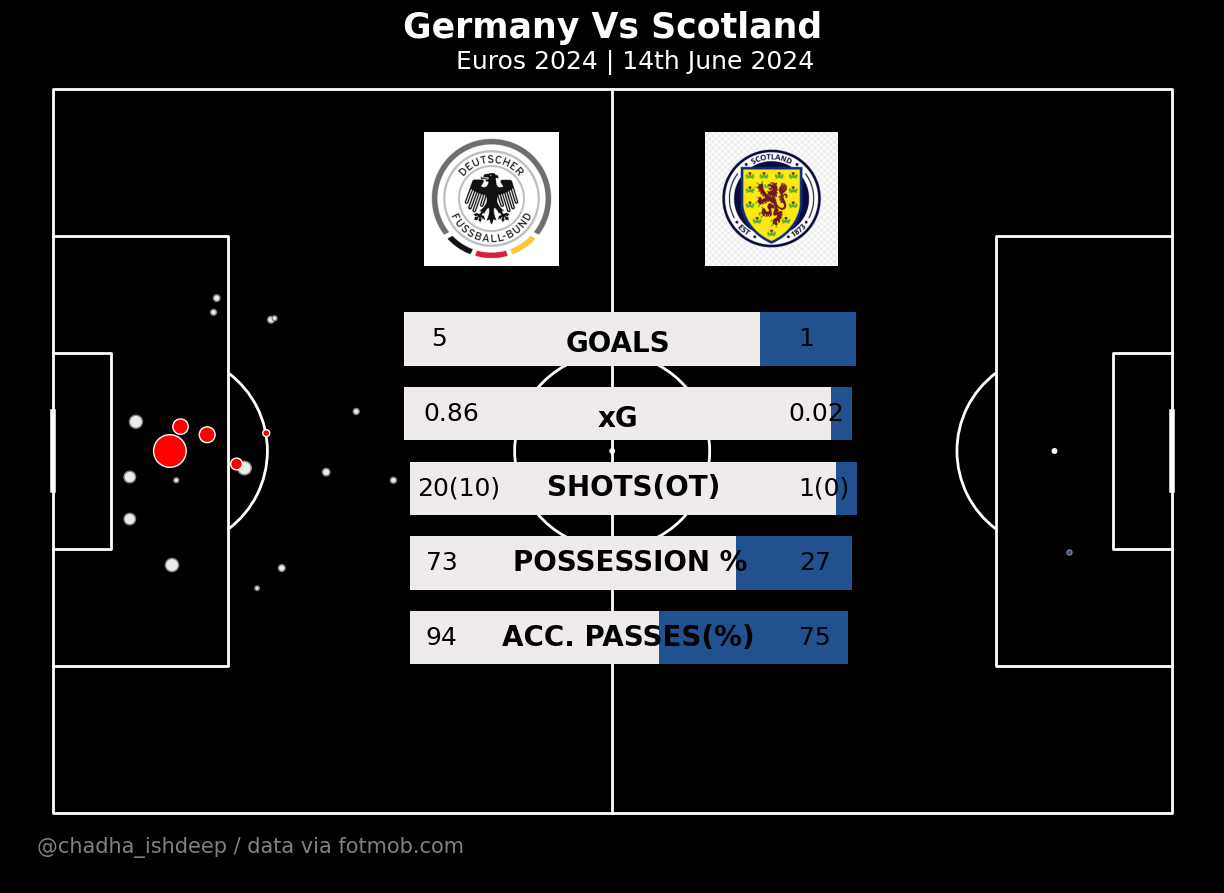

In [402]:
fig, axs = pitch.grid(grid_height=0.9, title_height=0.04, axis=False,
                     endnote_height=0.03, title_space=0, endnote_space=0)  # grid takes up 80% of the figure height


team1 = 'Germany'
team2 = 'Scotland'
#C:\Users\acer\Documents\GitHub\IndianCitizen\Images\TeamLogos
img_team1 = mpimg.imread(f'C:/Users/acer/Documents/GitHub/IndianCitizen/Images/TeamLogos/{team1}.png')
img_team2 = mpimg.imread(f'C:/Users/acer/Documents/GitHub/IndianCitizen/Images/TeamLogos/{team2}.png')
logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/IndianCitizen.png')


ax_image = add_image(
    img_team1, fig, left=0.33, bottom=0.7, width=0.15, height=0.15,aspect='equal'
)

ax_image = add_image(
    img_team2, fig, left=0.55, bottom=0.7, width=0.15, height=0.15,aspect='equal'
)

team1_facecolor = '#F0EBEB'
team2_facecolor = '#21518F'

sc_team1 = pitch.scatter(df_team1.x, df_team1.y, s=df_team1.expectedGoals * 700,
                         ec='grey', color=team1_facecolor, ax=axs['pitch'],zorder=2)
sc_team1_goals = pitch.scatter(df_team1_goals.x, df_team1_goals.y, s=df_team1_goals.expectedGoals * 700,
                         ec='white', color='red', ax=axs['pitch'],zorder=2)
sc_team2 = pitch.scatter(df_team2.x, df_team2.y, s=df_team2.expectedGoals * 700,
                         ec='grey', color=team2_facecolor, ax=axs['pitch'],zorder=2)
sc_team2_goals = pitch.scatter(df_team2_goals.x, df_team2_goals.y, s=df_team2_goals.expectedGoals * 700,
                         ec='white', color='blue', ax=axs['pitch'],zorder=2)
fig.set_facecolor('black')


# Set title
axs['pitch'].set_title(f'{team1} Vs {team2}',fontdict={'fontsize': 25, 'weight': 'bold', 'color': 'white'}, loc='center')
# Add subtitle
subtitle_text = "Euros 2024 | 14th June 2024"
axs['pitch'].text(0.37, 0.98, subtitle_text, ha='left', va='center', transform=axs['pitch'].transAxes, color='white', fontsize=18)



goals_team1 = team1_goals
goals_team2 = team2_goals

# Calculate the width of the rectangle for each team
total_goals = goals_team1 + goals_team2

# Define the minimum width for the rectangles
min_rect_width = 9

# Coordinates for the rectangle
rect_x = 33 # X-coordinate of the left side of the rectangle
rect_y = 42  # Y-coordinate of the top side of the rectangle
rect_width = 40  # Width of the rectangle
rect_height = 5  # Height of the rectangle

# Calculate the width of the rectangle for each team
# Calculate the width of the rectangle for each team
if goals_team1 == 0 and goals_team2 > 0:
    # If the home team scored 0 goals and the away team scored greater than 0
    width_team1 = 0
    width_team2 = 1
elif goals_team1 > 0 and goals_team2 == 0:
    # If the away team scored 0 goals and the home team scored greater than 0
    width_team1 = 1
    width_team2 = 0
elif total_goals > 0:
    # If both teams scored some goals
    width_team1 = max(goals_team1 / total_goals, min_rect_width / rect_width)
    width_team2 = max(goals_team2 / total_goals, min_rect_width / rect_width)
else:
    # Both teams scored 0 goals, set equal width for both
    width_team1 = min_rect_width / rect_width
    width_team2 = min_rect_width / rect_width


# Create a rectangle patch for team1
rect_team1 = Rectangle((rect_x, rect_y), width_team1 * rect_width, rect_height, facecolor=team1_facecolor,zorder=2)

# Create a rectangle patch for team2
rect_team2 = Rectangle((rect_x + width_team1 * rect_width, rect_y), width_team2 * rect_width, rect_height, facecolor=team2_facecolor,zorder=2)

# Add rectangles to the pitch
axs['pitch'].add_patch(rect_team1)
axs['pitch'].add_patch(rect_team2)

# Calculate the position for 'GOALS' text
goals_text_x = rect_x + width_team1 * rect_width + (width_team2 * rect_width - width_team1 * rect_width) / 2
goals_text_y = rect_y + rect_height / 2

# Add labels for teams' goals
axs['pitch'].text(37, rect_y + rect_height / 2, str(goals_team1), color='black', ha='right', va='center',fontsize=18)
axs['pitch'].text(53, 44, 'GOALS', color='black', ha='center', va='center',fontsize=20,fontproperties=font_manager.FontProperties(weight='bold'),zorder=2)
axs['pitch'].text(70, rect_y + rect_height / 2, str(goals_team2), color='black', ha='left', va='center',fontsize=18)

#### Adding xG

# Calculate the width of the rectangle for each team
total_xG = team1_xg + team2_xg
width_team1_xG = team1_xg / total_xG
width_team2_xG = team2_xg / total_xG

if width_team2_xG < 0.05:
    width_team1_xG = 1
    width_team2_xG = 0.05
elif width_team1_xG < 0.05:
    width_team2_xG = 1
    width_team1_xG = 0.05
    

# Coordinates for the rectangle
xG_rect_x = 33 # X-coordinate of the left side of the rectangle
xG_rect_y = 35 # Y-coordinate of the top side of the rectangle

# Create a rectangle patch for team1
xG_rect_team1 = Rectangle((xG_rect_x, xG_rect_y), width_team1_xG * rect_width, rect_height, facecolor=team1_facecolor,zorder=2)

# Create a rectangle patch for team2
xG_rect_team2 = Rectangle((xG_rect_x + width_team1_xG * rect_width, xG_rect_y), width_team2_xG * rect_width, rect_height, facecolor=team2_facecolor,zorder=2)

# Add rectangles to the pitch
axs['pitch'].add_patch(xG_rect_team1)
axs['pitch'].add_patch(xG_rect_team2)

# Add labels for teams' goals
axs['pitch'].text(40, xG_rect_y + rect_height / 2, str(team1_xg), color='black', ha='right', va='center',fontsize=18)
axs['pitch'].text(53, 37, 'xG', color='black', ha='center', va='center',fontsize=20,fontproperties=font_manager.FontProperties(weight='bold'))
axs['pitch'].text(69, xG_rect_y + rect_height / 2, str(team2_xg), color='black', ha='left', va='center',fontsize=18)


#### Adding Shots
shots_team1 = team1_shots
shots_team2 = team2_shots

shots_team1_ot = team1_shots_ot
shots_team2_ot = team2_shots_ot

# Calculate the width of the rectangle for each team
total_shots = shots_team1 + shots_team2
width_team1_shots = shots_team1 / total_shots
width_team2_shots = shots_team2 / total_shots

if width_team2_shots < 0.05:
    width_team1_shots = 1
    width_team2_shots = 0.05
elif width_team1_shots < 0.05:
    width_team2_shots = 1
    width_team1_shots = 0.05

# Coordinates for the rectangle
shots_rect_x = 33.5 # X-coordinate of the left side of the rectangle
shots_rect_y = 28 # Y-coordinate of the top side of the rectangle

# Create a rectangle patch for team1
shots_rect_team1 = Rectangle((shots_rect_x, shots_rect_y), width_team1_shots * rect_width, rect_height, facecolor=team1_facecolor,zorder=2)

# Create a rectangle patch for team2
shots_rect_team2 = Rectangle((shots_rect_x + width_team1_shots * rect_width, shots_rect_y), width_team2_shots * rect_width, rect_height, facecolor=team2_facecolor,zorder=2)

# Add rectangles to the pitch
axs['pitch'].add_patch(shots_rect_team1)
axs['pitch'].add_patch(shots_rect_team2)

# Calculate the position for 'GOALS' text
shots_text_x = shots_rect_x + width_team1_shots * rect_width + (width_team2_shots * rect_width - width_team1_shots * rect_width) / 2
shots_text_y = shots_rect_y + rect_height / 2

# Add labels for teams' goals
axs['pitch'].text(42, shots_rect_y + rect_height / 2, str(shots_team1) + '(' + str(shots_team1_ot) + ')', color='black', ha='right', va='center',fontsize=18)
axs['pitch'].text(shots_text_x, shots_text_y, 'SHOTS(OT)', color='black', ha='center', va='center',fontsize=20,fontproperties=font_manager.FontProperties(weight='bold'))
axs['pitch'].text(70, shots_rect_y + rect_height / 2, str(shots_team2) + '(' + str(shots_team2_ot) + ')', color='black', ha='left', va='center',fontsize=18)


#### Adding possesion
# Calculate the width of the rectangle for each team
total_possesion = team1_pos + team2_pos
width_team1_possesion = (team1_pos / total_possesion)*1.05
width_team2_possesion = team2_pos / total_possesion

# Coordinates for the rectangle
possesion_rect_x = 33.5 # X-coordinate of the left side of the rectangle
possesion_rect_y = 21 # Y-coordinate of the top side of the rectangle

# Create a rectangle patch for team1
possesion_rect_team1 = Rectangle((possesion_rect_x, possesion_rect_y), width_team1_possesion * rect_width, rect_height, facecolor=team1_facecolor,zorder=2)

# Create a rectangle patch for team2
possesion_rect_team2 = Rectangle((possesion_rect_x + width_team1_possesion * rect_width, possesion_rect_y), width_team2_possesion * rect_width, rect_height, facecolor=team2_facecolor,zorder=2)

# Add rectangles to the pitch
axs['pitch'].add_patch(possesion_rect_team1)
axs['pitch'].add_patch(possesion_rect_team2)

# Calculate the position for 'GOALS' text
possesion_text_x = possesion_rect_x + width_team1_possesion * rect_width + (width_team2_possesion * rect_width - width_team1_possesion * rect_width) / 2
possesion_text_y = possesion_rect_y + rect_height / 2

# Add labels for teams' goals
axs['pitch'].text(38, possesion_rect_y + rect_height / 2, str(team1_pos), color='black', ha='right', va='center',fontsize=18)
axs['pitch'].text(possesion_text_x, possesion_text_y, 'POSSESSION %', color='black', ha='center', va='center',fontsize=20,fontproperties=font_manager.FontProperties(weight='bold'))
axs['pitch'].text(70, possesion_rect_y + rect_height / 2, str(team2_pos), color='black', ha='left', va='center',fontsize=18)


#### Adding Accurate Passes
# Calculate the width of the rectangle for each team
total_acc_passes = team1_acc_passes + team2_acc_passes
width_team1_acc_passes = (team1_acc_passes / total_acc_passes)*1.05
width_team2_acc_passes = team2_acc_passes / total_acc_passes

# Coordinates for the rectangle
acc_passes_rect_x = 33.5 # X-coordinate of the left side of the rectangle
acc_passes_rect_y = 14 # Y-coordinate of the top side of the rectangle

# Create a rectangle patch for team1
acc_passes_rect_team1 = Rectangle((acc_passes_rect_x, acc_passes_rect_y), width_team1_acc_passes * rect_width, rect_height, facecolor=team1_facecolor,zorder=2)

# Create a rectangle patch for team2
acc_passes_rect_team2 = Rectangle((acc_passes_rect_x + width_team1_acc_passes * rect_width, acc_passes_rect_y), width_team2_acc_passes * rect_width, rect_height, facecolor=team2_facecolor,zorder=2)

# Add rectangles to the pitch
axs['pitch'].add_patch(acc_passes_rect_team1)
axs['pitch'].add_patch(acc_passes_rect_team2)

# Calculate the position for 'GOALS' text
acc_passes_text_x = acc_passes_rect_x + width_team1_acc_passes * rect_width + (width_team2_acc_passes * rect_width - width_team1_acc_passes * rect_width) / 2
acc_passes_text_y = acc_passes_rect_y + rect_height / 2

# Add labels for teams' goals
axs['pitch'].text(38, acc_passes_rect_y + rect_height / 2, str(team1_acc_passes), color='black', ha='right', va='center',fontsize=18)
axs['pitch'].text(acc_passes_text_x, acc_passes_text_y, 'ACC. PASSES(%)', color='black', ha='center', va='center',fontsize=20,fontproperties=font_manager.FontProperties(weight='bold'))
axs['pitch'].text(70, acc_passes_rect_y + rect_height / 2, str(team2_acc_passes), color='black', ha='left', va='center',fontsize=18)

endnote_text = "@chadha_ishdeep / data via fotmob.com"
axs['pitch'].annotate(endnote_text, xy=(0.2, 0.01), xycoords='axes fraction',ha='center', va='center', fontsize=15, color='gray')


plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{team1}V{team2}_Report.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## PASSING NETWORK

In [243]:
import re
import json
def extract_json_from_html(html_path, save_output=False):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html = html_file.read()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [244]:
html_path = 'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/GermanyVScotland.html'
json_data_txt = extract_json_from_html(html_path)

In [245]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df_whoscored = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df_whoscored["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df_whoscored = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df_whoscored["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df_whoscored = pd.concat([players_home_df_whoscored, players_away_df_whoscored])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df_whoscored, teams_dict

In [246]:
data = json.loads(json_data_txt)
events_dict, players_df_whoscored, teams_dict = extract_data_from_dict(data)

In [254]:
def get_passes_df_whoscored(events_dict):
    df_whoscored = pd.DataFrame(events_dict)
    df_whoscored['eventType'] = df_whoscored.apply(lambda row: row['type']['displayName'], axis=1)
    df_whoscored['outcomeType'] = df_whoscored.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df_whoscored["receiver"] = df_whoscored["playerId"].shift(-1)

    # filter only passes
    passes_ids = df_whoscored.index[df_whoscored['eventType'] == 'Pass']
    df_whoscored_passes = df_whoscored.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_whoscored,df_whoscored_passes

In [342]:
df_whoscored,passes_df_whoscored = get_passes_df_whoscored(events_dict)

In [259]:
def get_passes_between_df_whoscored(team_id, passes_df_whoscored, players_df_whoscored):
    # filter for only team
    passes_df_whoscored = passes_df_whoscored[passes_df_whoscored["teamId"] == team_id]

    # add column with first eleven players only
    passes_df_whoscored = passes_df_whoscored.merge(players_df_whoscored[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df_whoscored = passes_df_whoscored[passes_df_whoscored['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df_whoscored = (passes_df_whoscored.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df_whoscored.columns = ['x', 'y', 'count']
    average_locs_and_count_df_whoscored = average_locs_and_count_df_whoscored.merge(players_df_whoscored[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df_whoscored = average_locs_and_count_df_whoscored.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df_whoscored = passes_df_whoscored.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df_whoscored['pos_max'] = (passes_player_ids_df_whoscored[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df_whoscored['pos_min'] = (passes_player_ids_df_whoscored[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df_whoscored = passes_player_ids_df_whoscored.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df_whoscored.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df_whoscored = passes_between_df_whoscored.merge(average_locs_and_count_df_whoscored, left_on='pos_min', right_index=True)
    passes_between_df_whoscored = passes_between_df_whoscored.merge(average_locs_and_count_df_whoscored, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df_whoscored, average_locs_and_count_df_whoscored

In [260]:
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df_whoscored, home_average_locs_and_count_df_whoscored = get_passes_between_df_whoscored(home_team_id, passes_df_whoscored, players_df_whoscored)

away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df_whoscored, away_average_locs_and_count_df_whoscored = get_passes_between_df_whoscored(away_team_id, passes_df_whoscored, players_df_whoscored)

In [352]:
from matplotlib.colors import to_rgba
def pass_network_visualization(ax, passes_between_df_whoscored, average_locs_and_count_df_whoscored, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 2000
    passes_between_df_whoscored['width'] = (passes_between_df_whoscored.pass_count / passes_between_df_whoscored.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df_whoscored['marker_size'] = (average_locs_and_count_df_whoscored['count']
                                                / average_locs_and_count_df_whoscored['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#507293'))
    color = np.tile(color, (len(passes_between_df_whoscored), 1))
    c_transparency = passes_between_df_whoscored.pass_count / passes_between_df_whoscored.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='white')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df_whoscored['x'] = pitch.dim.right - passes_between_df_whoscored['x']
        passes_between_df_whoscored['y'] = pitch.dim.right - passes_between_df_whoscored['y']
        passes_between_df_whoscored['x_end'] = pitch.dim.right - passes_between_df_whoscored['x_end']
        passes_between_df_whoscored['y_end'] = pitch.dim.right - passes_between_df_whoscored['y_end']
        average_locs_and_count_df_whoscored['x'] = pitch.dim.right - average_locs_and_count_df_whoscored['x']
        average_locs_and_count_df_whoscored['y'] = pitch.dim.right - average_locs_and_count_df_whoscored['y']

    pass_lines = pitch.lines(passes_between_df_whoscored.x, passes_between_df_whoscored.y,
                             passes_between_df_whoscored.x_end, passes_between_df_whoscored.y_end, lw=passes_between_df_whoscored.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df_whoscored.x, average_locs_and_count_df_whoscored.y,
                               s=average_locs_and_count_df_whoscored.marker_size, marker='o',
                               color='#FEFEFC', edgecolors='#FEFEFC', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df_whoscored.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='black', va='center',
                       ha='center', size=14, ax=ax)

    return pitch

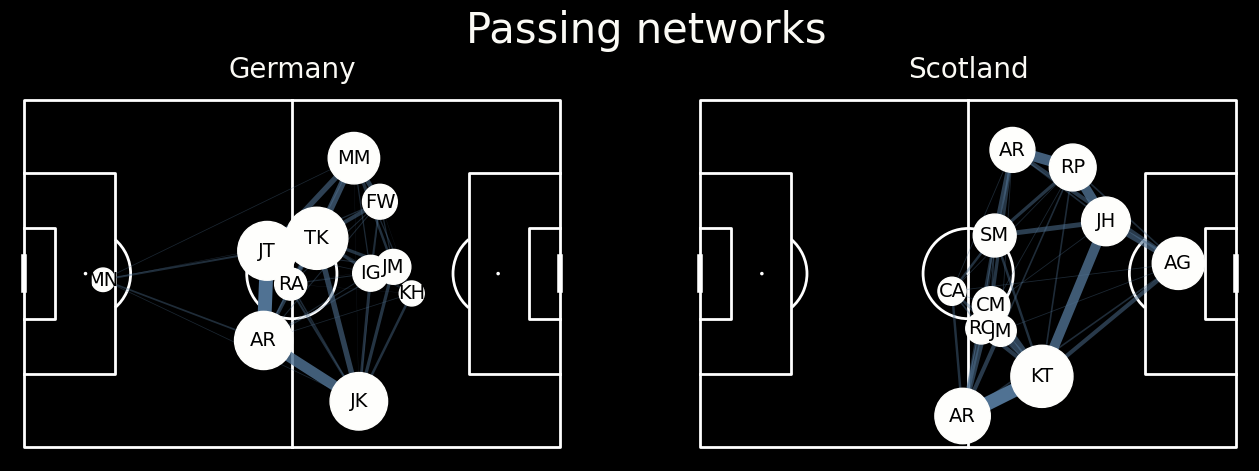

In [353]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
#plt.tight_layout()
fig.set_facecolor("black")

# plot variables
main_color = '#FBFAF5'

# home team viz
pass_network_visualization(axes[0], home_passes_between_df_whoscored, home_average_locs_and_count_df_whoscored)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=20)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df_whoscored, away_average_locs_and_count_df_whoscored, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=20)

#plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42)
subtitle = "Passing networks"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=30)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{teams_dict[home_team_id]}V{teams_dict[away_team_id]}.png',dpi=500,bbox_inches = 'tight',facecolor='#0D182E')

## PASSMAPS

In [376]:
passes_df = passes_df_whoscored.merge(players_df_whoscored[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')

In [377]:
passes_df['outcomeType'].unique()

array(['Successful', 'Unsuccessful'], dtype=object)

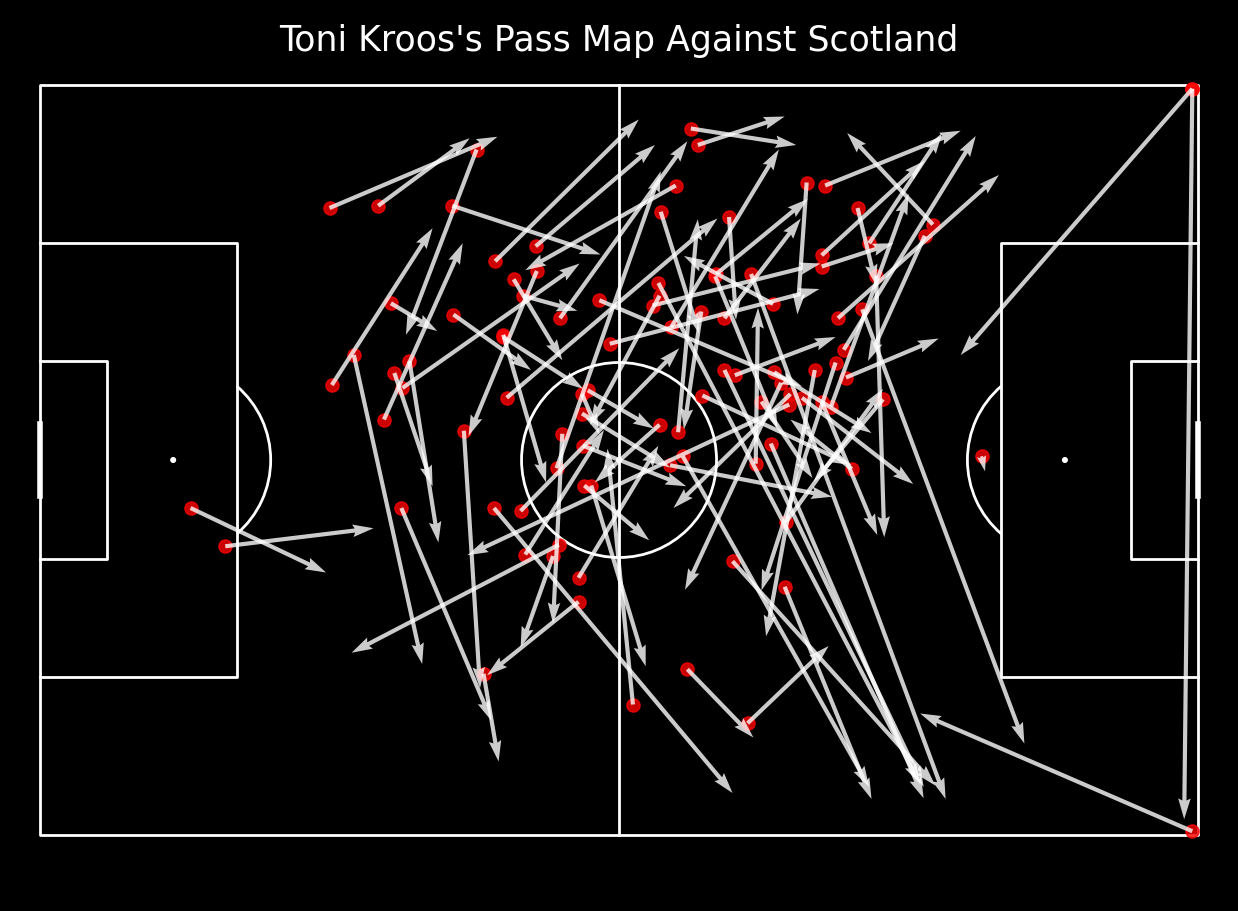

In [378]:
player = 'Toni Kroos'
player_passes_df = passes_df.loc[(passes_df['name'] == player) & (passes_df['outcomeType'] == 'Successful')]

pitch = Pitch(pitch_type='opta',pitch_color='black', line_color='white',
              pad_top=4)  # optional stripes
fig, ax = pitch.grid(grid_height=0.9, title_height=0.05, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)


fig.set_facecolor('black')
pitch.scatter(player_passes_df.x, player_passes_df.y, alpha = 0.8, s = 90, color = "red", ax=ax['pitch'])
pitch.arrows(player_passes_df.x, player_passes_df.y,player_passes_df.endX, player_passes_df.endY, color = "white", ax=ax['pitch'],width=3,alpha=0.8)

        
fig.suptitle(f"{player}'s Pass Map Against {teams_dict[away_team_id]}", fontsize = 25,color='white')
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{player}.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## PASSFLOW MAPS

In [324]:
passes_df_whoscored['teamId'].unique()

array([336, 424], dtype=int64)

In [330]:
team1_passes_df = passes_df_whoscored[passes_df_whoscored['teamId']==336]
team2_passes_df = passes_df_whoscored[passes_df_whoscored['teamId']==424]

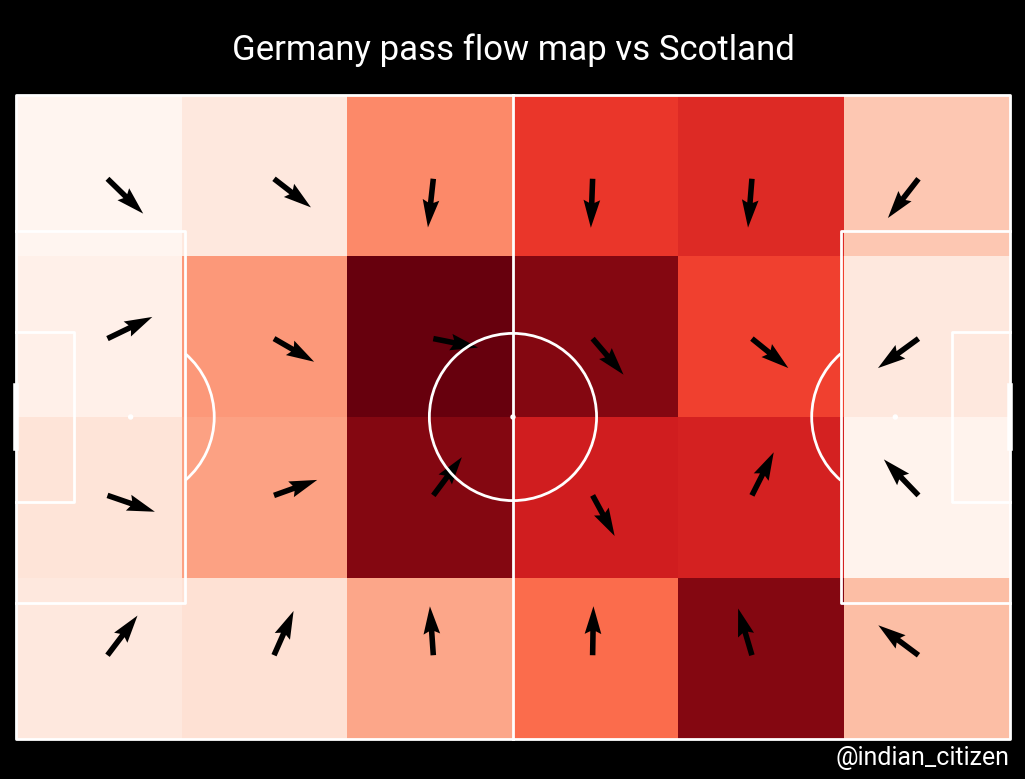

In [332]:
pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='white', pitch_color='black')
bins = (6, 4)
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('black')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(team1_passes_df.x, team1_passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Reds')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(team1_passes_df.x, team1_passes_df.y, team1_passes_df.endX, team1_passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FontManager()  # default is loading robotto font from google fonts
axs['title'].text(0.5, 0.5, f'{team1} pass flow map vs {team2}',
                  fontsize=25, fontproperties=font.prop,color='white', va='center', ha='center')
axs['endnote'].text(1, 0.5, '@indian_citizen',
                    fontsize=18, fontproperties=font.prop,color='white', va='center', ha='right')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{team1} PassFlowMap.png',dpi=500,bbox_inches = 'tight',facecolor=background)

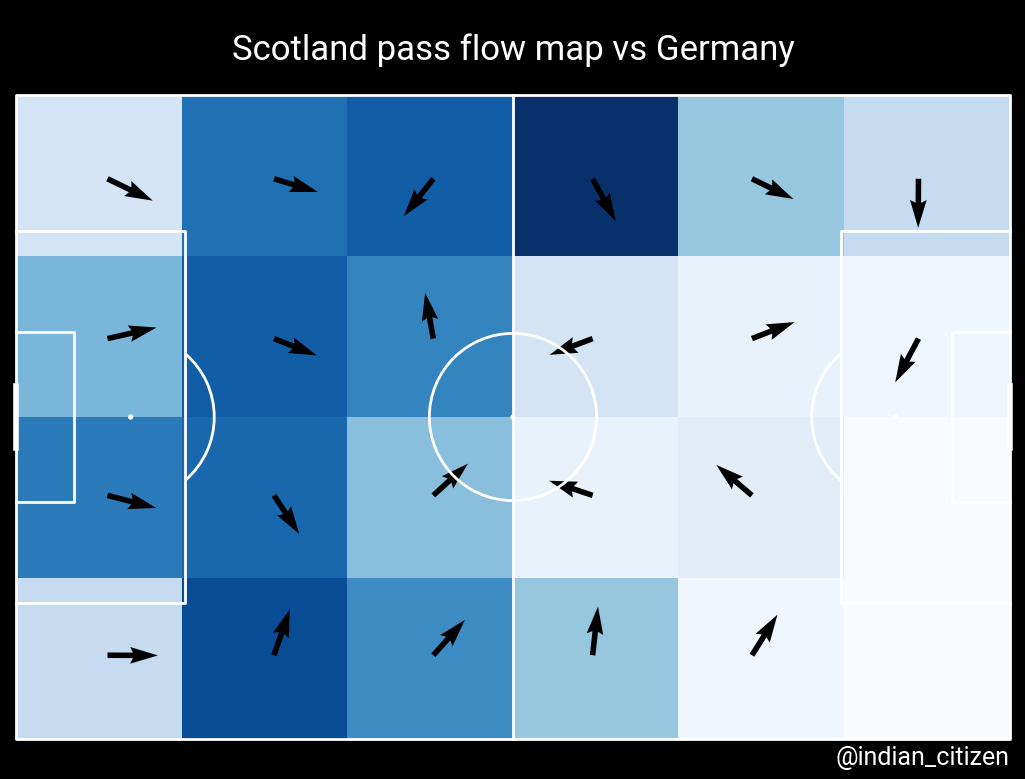

In [334]:
pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='white', pitch_color='black')
bins = (6, 4)
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('black')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(team2_passes_df.x, team2_passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(team2_passes_df.x, team2_passes_df.y, team2_passes_df.endX, team2_passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FontManager()  # default is loading robotto font from google fonts
axs['title'].text(0.5, 0.5, f'{team2} pass flow map vs {team1}',
                  fontsize=25, fontproperties=font.prop,color='white', va='center', ha='center')
axs['endnote'].text(1, 0.5, '@indian_citizen',
                    fontsize=18, fontproperties=font.prop,color='white', va='center', ha='right')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{team2} PassFlowMap.png',dpi=500,bbox_inches = 'tight',facecolor=background)